In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
Categories_retak=['retak','tidak_retak']
Categories_pucat=['pucat','tidak_pucat']
target_retak = []
target_pucat = []
flat_data_retak = []
flat_data_pucat = []
images_retak = []
images_pucat = []

datadir = 'C:/Users/Ghofar/TA in Jupyter/datasets/fix_datasets/Dataset_TA/150x150/FormatData_A/new dataset'

In [2]:
#MODEL ML RETAK

In [3]:
for i in Categories_retak:
  print("Category is:",i,"\tLabel encoded as:",Categories_retak.index(i))
  target_class_retak = Categories_retak.index(i)
  # Create data path for all folders
  path = os.path.join(datadir,i)
  # Image resizing, to ensure all images are of same dimensions
  for img_retak in os.listdir(path):
    img_array_retak = imread(os.path.join(path,img_retak))
    # Skimage normalizes the value of image
    img_resized_retak = resize(img_array_retak,(150,150,3))
    flat_data_retak.append(img_resized_retak.flatten())
    images_retak.append(img_resized_retak)
    target_retak.append(target_class_retak)
# Convert list to numpy array format
flat_data_retak = np.array(flat_data_retak)
images_retak = np.array(images_retak)
target_retak = np.array(target_retak)

Category is: retak 	Label encoded as: 0
Category is: tidak_retak 	Label encoded as: 1


In [4]:
df_retak = pd.DataFrame(flat_data_retak)
# Create a column for output data called Target
df_retak['Target_retak'] = target_retak
df_retak

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target_retak
0,0.019608,0.019608,0.027451,0.019608,0.019608,0.027451,0.031373,0.031373,0.039216,0.039216,...,0.058824,0.058824,0.027451,6.666667e-02,6.666667e-02,3.529412e-02,7.058824e-02,7.058824e-02,0.039216,0
1,0.011765,0.011765,0.019608,0.023529,0.023529,0.031373,0.023529,0.023529,0.031373,0.015686,...,0.070588,0.078431,0.074510,7.450980e-02,8.235294e-02,7.843137e-02,8.627451e-02,9.411765e-02,0.090196,0
2,0.015686,0.015686,0.015686,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,...,0.086275,0.109804,0.109804,7.843137e-02,1.019608e-01,1.019608e-01,7.843137e-02,1.019608e-01,0.101961,0
3,0.015686,0.015686,0.023529,0.023529,0.023529,0.031373,0.015686,0.015686,0.023529,0.015686,...,0.074510,0.105882,0.113725,7.843137e-02,1.098039e-01,1.176471e-01,9.411765e-02,1.254902e-01,0.133333,0
4,0.011765,0.011765,0.019608,0.027451,0.027451,0.035294,0.023529,0.023529,0.031373,0.015686,...,0.003922,0.003922,0.003922,3.921569e-03,3.921569e-03,3.921569e-03,7.843137e-03,7.843137e-03,0.007843,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.003922,0.003922,0.011765,0.003922,0.003922,0.011765,0.003922,0.003922,0.011765,0.007843,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1
296,0.007843,0.007843,0.015686,0.011765,0.011765,0.019608,0.011765,0.011765,0.019608,0.007843,...,0.000000,0.000000,0.000000,2.229154e-16,2.229154e-16,2.229154e-16,3.921569e-03,3.921569e-03,0.003922,1
297,0.007843,0.007843,0.015686,0.007843,0.007843,0.015686,0.007843,0.007843,0.015686,0.007843,...,0.000000,0.000000,0.000000,3.921569e-03,3.921569e-03,1.176471e-02,3.921569e-03,3.921569e-03,0.011765,1
298,0.019608,0.019608,0.027451,0.015686,0.015686,0.023529,0.011765,0.011765,0.019608,0.011765,...,0.000000,0.000000,0.000000,3.921569e-03,3.921569e-03,1.176471e-02,2.229154e-16,2.229154e-16,0.007843,1


AxesImage(54,36;334.8x217.44)


0

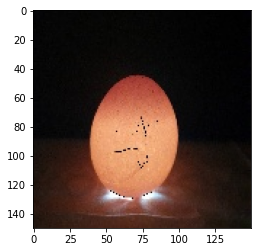

In [5]:
print(plt.imshow(images_retak[0]))
df_retak['Target_retak'][0]

In [6]:
from sklearn.model_selection import train_test_split

x_retak = df_retak.iloc[:,:-1].values
y_retak = target_retak
print("Input data dimensions:",x_retak.shape)
print("Output data dimensions:",y_retak.shape)

x_retak_train,x_retak_val,y_retak_train,y_retak_val = train_test_split(x_retak,y_retak,shuffle=True,test_size = 0.3,random_state=109,stratify=y_retak)
print("Dimensions of input training data:",x_retak_train.shape)
print("Dimensions of input testing data:",x_retak_val.shape)
print("Dimensions of output training data:",y_retak_train.shape)
print("Dimensions of output testing data:",y_retak_val.shape)

Input data dimensions: (300, 67500)
Output data dimensions: (300,)
Dimensions of input training data: (210, 67500)
Dimensions of input testing data: (90, 67500)
Dimensions of output training data: (210,)
Dimensions of output testing data: (90,)


In [7]:
print(np.unique(y_retak_train,return_counts=True))
print(np.unique(y_retak_val,return_counts=True))

(array([0, 1]), array([105, 105], dtype=int64))
(array([0, 1]), array([45, 45], dtype=int64))


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

tuned_parameters_retak = [{'kernel': ['linear', 'poly', 'rbf'], 'gamma': [1e-3, 1e-4, 1e-5, 1e-6],'C': [500, 600, 700,800,900, 1000]}]

cv_retak = GridSearchCV(SVC(), tuned_parameters_retak, refit = True,verbose= 3) 
cv_retak.fit(x_retak,y_retak)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END .C=500, gamma=0.001, kernel=linear;, score=0.883 total time=   2.4s
[CV 2/5] END .C=500, gamma=0.001, kernel=linear;, score=0.850 total time=   2.7s
[CV 3/5] END .C=500, gamma=0.001, kernel=linear;, score=0.783 total time=   2.5s
[CV 4/5] END .C=500, gamma=0.001, kernel=linear;, score=0.883 total time=   2.5s
[CV 5/5] END .C=500, gamma=0.001, kernel=linear;, score=0.983 total time=   2.7s
[CV 1/5] END ...C=500, gamma=0.001, kernel=poly;, score=0.850 total time=   2.2s
[CV 2/5] END ...C=500, gamma=0.001, kernel=poly;, score=0.900 total time=   2.4s
[CV 3/5] END ...C=500, gamma=0.001, kernel=poly;, score=0.650 total time=   2.1s
[CV 4/5] END ...C=500, gamma=0.001, kernel=poly;, score=0.900 total time=   2.3s
[CV 5/5] END ...C=500, gamma=0.001, kernel=poly;, score=0.983 total time=   2.6s
[CV 1/5] END ....C=500, gamma=0.001, kernel=rbf;, score=0.850 total time=   3.4s
[CV 2/5] END ....C=500, gamma=0.001, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [500, 600, 700, 800, 900, 1000],
                          'gamma': [0.001, 0.0001, 1e-05, 1e-06],
                          'kernel': ['linear', 'poly', 'rbf']}],
             verbose=3)

In [9]:
print("Best parameters to apply are:",cv_retak.best_params_)
svm_retak = cv_retak.best_estimator_
print("Model after tuning is:\n",svm_retak)

Best parameters to apply are: {'C': 600, 'gamma': 1e-05, 'kernel': 'rbf'}
Model after tuning is:
 SVC(C=600, gamma=1e-05)


In [11]:
y_retak_prediction = svm_retak.predict(x_retak_val)

In [12]:
print("Expected results: ",y_retak_val)
print("Predicted results:",y_retak_prediction)

Expected results:  [1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0
 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1]
Predicted results: [1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0
 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1]


In [13]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print("Confusion matrix results:\n",confusion_matrix(y_retak_prediction,y_retak_val))
print("\nClassification report of model:\n",classification_report(y_retak_prediction,y_retak_val))
print("Accuracy score:",100*accuracy_score(y_retak_prediction,y_retak_val))

Confusion matrix results:
 [[42  2]
 [ 3 43]]

Classification report of model:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        44
           1       0.96      0.93      0.95        46

    accuracy                           0.94        90
   macro avg       0.94      0.94      0.94        90
weighted avg       0.94      0.94      0.94        90

Accuracy score: 94.44444444444444


In [16]:
import pickle
pickle.dump(svm_retak,open("Classification_Model_retak_val_5_300data_30%split_real.p","wb"))

In [17]:
#ML Model Pucat

In [7]:
for i in Categories_pucat:
  print("Category is:",i,"\tLabel encoded as:",Categories_pucat.index(i))
  target_class_pucat = Categories_pucat.index(i)
  path = os.path.join(datadir,i)
  for img_pucat in os.listdir(path):
    img_array_pucat = imread(os.path.join(path,img_pucat))
    # Skimage normalizes the value of image
    img_resized_pucat = resize(img_array_pucat,(150,150,3))
    flat_data_pucat.append(img_resized_pucat.flatten())
    images_pucat.append(img_resized_pucat)
    target_pucat.append(target_class_pucat)
# Convert list to numpy array format
flat_data_pucat = np.array(flat_data_pucat)
images_pucat = np.array(images_pucat)
target_pucat = np.array(target_pucat)

Category is: pucat 	Label encoded as: 0
Category is: tidak_pucat 	Label encoded as: 1


In [8]:
df_pucat = pd.DataFrame(flat_data_pucat)
# Create a column for output data called Target
df_pucat['Target_pucat'] = target_pucat
df_pucat

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target_pucat
0,0.784314,0.231373,0.050980,0.784314,0.231373,0.050980,0.784314,0.231373,0.050980,0.784314,...,0.898039,0.184314,0.039216,0.898039,0.184314,0.039216,0.898039,0.184314,0.039216,0
1,0.784314,0.231373,0.050980,0.784314,0.231373,0.050980,0.788235,0.235294,0.054902,0.788235,...,0.905882,0.192157,0.047059,0.905882,0.192157,0.047059,0.905882,0.192157,0.047059,0
2,0.803922,0.219608,0.050980,0.803922,0.219608,0.050980,0.803922,0.219608,0.050980,0.803922,...,0.909804,0.176471,0.039216,0.909804,0.176471,0.039216,0.909804,0.176471,0.039216,0
3,0.788235,0.231373,0.050980,0.788235,0.231373,0.050980,0.788235,0.231373,0.050980,0.788235,...,0.886275,0.188235,0.047059,0.886275,0.188235,0.047059,0.886275,0.188235,0.047059,0
4,0.764706,0.207843,0.050980,0.764706,0.207843,0.050980,0.764706,0.207843,0.050980,0.764706,...,0.882353,0.192157,0.047059,0.874510,0.192157,0.047059,0.874510,0.192157,0.047059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.725490,0.588235,0.031373,0.725490,0.588235,0.031373,0.725490,0.588235,0.031373,0.725490,...,0.937255,0.396078,0.039216,0.937255,0.396078,0.039216,0.933333,0.392157,0.035294,1
296,0.819608,0.490196,0.035294,0.815686,0.486275,0.031373,0.811765,0.482353,0.027451,0.811765,...,0.882353,0.419608,0.035294,0.878431,0.423529,0.035294,0.870588,0.423529,0.035294,1
297,0.894118,0.450980,0.035294,0.894118,0.450980,0.035294,0.901961,0.447059,0.043137,0.901961,...,0.780392,0.552941,0.031373,0.780392,0.549020,0.039216,0.780392,0.549020,0.039216,1
298,0.729412,0.576471,0.031373,0.729412,0.576471,0.031373,0.737255,0.572549,0.031373,0.733333,...,0.933333,0.392157,0.043137,0.933333,0.384314,0.039216,0.929412,0.380392,0.035294,1


AxesImage(54,36;334.8x217.44)


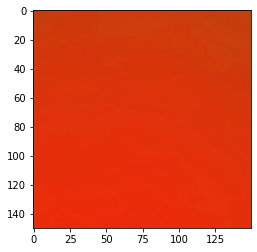

In [9]:
print(plt.imshow(images_pucat[0]))

In [10]:
from sklearn.model_selection import train_test_split
x_pucat = df_pucat.iloc[:,:-1].values
y_pucat = target_pucat
print("Input data dimensions:",x_pucat.shape)
print("Output data dimensions:",y_pucat.shape)

x_pucat_train,x_pucat_val,y_pucat_train,y_pucat_val = train_test_split(x_pucat,y_pucat,shuffle=True,test_size = 0.3,random_state=109,stratify=y_pucat)
print("Dimensions of input training data:",x_pucat_train.shape)
print("Dimensions of input testing data:",x_pucat_val.shape)
print("Dimensions of output training data:",y_pucat_train.shape)
print("Dimensions of output testing data:",y_pucat_val.shape)

Input data dimensions: (300, 67500)
Output data dimensions: (300,)
Dimensions of input training data: (210, 67500)
Dimensions of input testing data: (90, 67500)
Dimensions of output training data: (210,)
Dimensions of output testing data: (90,)


In [14]:
print(np.unique(y_pucat_train,return_counts=True))
print(np.unique(y_pucat_val,return_counts=True))

(array([0, 1]), array([105, 105], dtype=int64))
(array([0, 1]), array([45, 45], dtype=int64))


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

tuned_parameters_pucat = [{'kernel': ['linear', 'poly', 'rbf'], 'gamma': [1e-3, 1e-4, 1e-5, 1e-6],'C': [500, 600, 700,800,900, 1000]}]
                    
cv_pucat = GridSearchCV(SVC(), tuned_parameters_pucat, refit = True,verbose= 3) 
cv_pucat.fit(x_pucat,y_pucat)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END .C=500, gamma=0.001, kernel=linear;, score=1.000 total time=   0.4s
[CV 2/5] END .C=500, gamma=0.001, kernel=linear;, score=1.000 total time=   0.4s
[CV 3/5] END .C=500, gamma=0.001, kernel=linear;, score=0.983 total time=   0.2s
[CV 4/5] END .C=500, gamma=0.001, kernel=linear;, score=0.933 total time=   0.2s
[CV 5/5] END .C=500, gamma=0.001, kernel=linear;, score=1.000 total time=   0.5s
[CV 1/5] END ...C=500, gamma=0.001, kernel=poly;, score=1.000 total time=   0.4s
[CV 2/5] END ...C=500, gamma=0.001, kernel=poly;, score=1.000 total time=   0.4s
[CV 3/5] END ...C=500, gamma=0.001, kernel=poly;, score=0.983 total time=   0.2s
[CV 4/5] END ...C=500, gamma=0.001, kernel=poly;, score=0.933 total time=   0.2s
[CV 5/5] END ...C=500, gamma=0.001, kernel=poly;, score=1.000 total time=   0.4s
[CV 1/5] END ....C=500, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.4s
[CV 2/5] END ....C=500, gamma=0.001, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [500, 600, 700, 800, 900, 1000],
                          'gamma': [0.001, 0.0001, 1e-05, 1e-06],
                          'kernel': ['linear', 'poly', 'rbf']}],
             verbose=3)

In [16]:
print("Best parameters to apply are:",cv_pucat.best_params_)
svm_pucat = cv_pucat.best_estimator_
print("Model after tuning is:\n",svm_pucat)

Best parameters to apply are: {'C': 500, 'gamma': 1e-05, 'kernel': 'poly'}
Model after tuning is:
 SVC(C=500, gamma=1e-05, kernel='poly')


In [25]:
y_pucat_prediction = svm_pucat.predict(x_pucat_val)

In [26]:
print("Expected results: ",y_pucat_val)
print("Predicted results:",y_pucat_prediction)

Expected results:  [1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0
 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1]
Predicted results: [1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0
 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1]


In [27]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print("Confusion matrix results:\n",confusion_matrix(y_pucat_prediction,y_pucat_val))
print("\nClassification report of model:\n",classification_report(y_pucat_prediction,y_pucat_val))
print("Accuracy score:",100*accuracy_score(y_pucat_prediction,y_pucat_val))

Confusion matrix results:
 [[45  0]
 [ 0 45]]

Classification report of model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        45

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

Accuracy score: 100.0


In [29]:
import pickle
pickle.dump(svm_pucat,open("Classification_Model_pucat_val_5_300data_30%split_real.p","wb"))

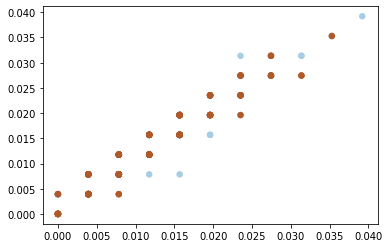

In [20]:
plt.scatter(x_retak[:, 1], x_retak[:, 0], c=y_retak, s=30, cmap=plt.cm.Paired)

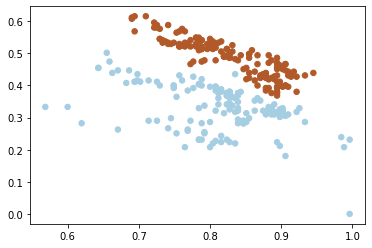

In [15]:
plt.scatter(x_pucat[:, 0], x_pucat[:, 1], c=y_pucat, s=30, cmap=plt.cm.Paired)